In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing or loading the dataset
dataset = pd.read_csv('Heart_data.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        38 non-null     int64  
 1   ccf       38 non-null     int64  
 2   age       38 non-null     int64  
 3   sex       38 non-null     int64  
 4   painloc   38 non-null     int64  
 5   painexer  38 non-null     int64  
 6   relrest   38 non-null     int64  
 7   pncaden   38 non-null     int64  
 8   cp        38 non-null     int64  
 9   trestbps  38 non-null     int64  
 10  htn       38 non-null     int64  
 11  chol      38 non-null     int64  
 12  smoke     38 non-null     int64  
 13  cigs      38 non-null     int64  
 14  years     38 non-null     int64  
 15  fbs       38 non-null     int64  
 16  dm        38 non-null     int64  
 17  famhist   38 non-null     int64  
 18  restecg   38 non-null     int64  
 19  ekgmo     38 non-null     int64  
 20  ekgday    38 non-null     int64  


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["name"] = le.fit_transform(dataset["name"])
dataset["junk"] = le.fit_transform(dataset["junk"])

In [ ]:
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

In [ ]:
X = dataset.drop(columns=["htn"])
y = dataset["htn"]

In [ ]:
dataset.isnull().sum()

,0
id,0
ccf,0
age,0
sex,0
painloc,0
...,...
lvx4,0
lvf,0
cathef,0
junk,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=14)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

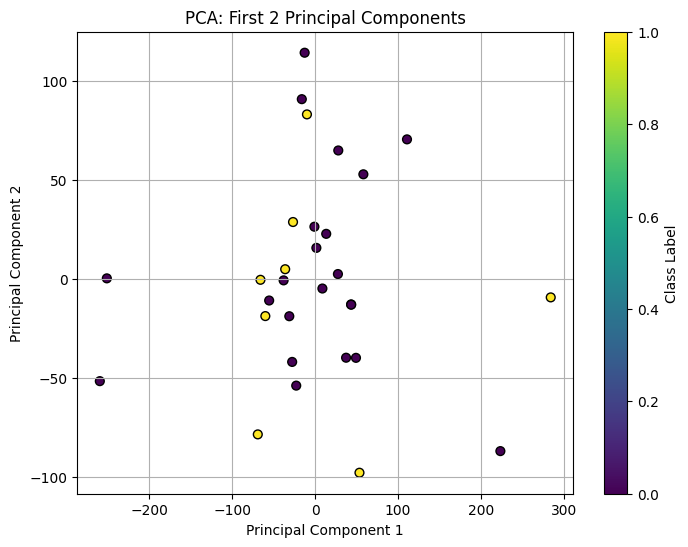

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have y_train labels
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First 2 Principal Components')
plt.colorbar(scatter, label='Class Label')
plt.grid(True)
plt.show()


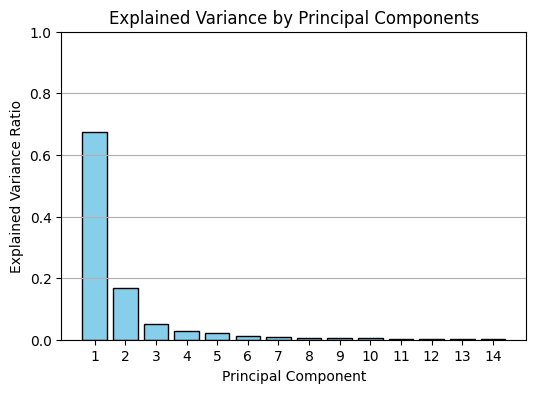

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Bar chart for explained variance
plt.figure(figsize=(6,4))
components = np.arange(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, color='skyblue', edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(components)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a list of feature names
# Replace this with your actual feature names if needed
feature_names = X.columns  # If X is a DataFrame

# Create column names dynamically for PC1 to PC14
pc_labels = [f'PC{i+1}' for i in range(14)]

# Create a DataFrame with the PCA components (loadings)
loadings_df = pd.DataFrame(pca.components_.T,
                           columns=pc_labels,
                           index=feature_names)

print("PCA Loadings Table:")
print(loadings_df)


PCA Loadings Table:
                  PC1           PC2           PC3           PC4           PC5  \
id       1.493199e-02 -2.463227e-02 -1.459455e-01  7.064351e-02  1.416772e-01   
ccf     -4.783752e-17 -2.072786e-17  7.346082e-17  1.658662e-16 -2.522654e-16   
age     -2.785154e-03 -7.798411e-02 -4.151769e-02 -1.234447e-01  3.941587e-03   
sex     -1.602171e-04  3.428299e-03 -2.523712e-03 -4.878035e-03  1.047758e-02   
painloc -4.892660e-06 -2.032118e-04 -1.119151e-03 -1.667209e-03  2.174476e-03   
...               ...           ...           ...           ...           ...   
lvx4     4.583060e-06 -9.944556e-06 -3.194298e-04  1.917422e-04 -2.356298e-04   
lvf     -6.326443e-04 -2.035504e-05 -1.915181e-03  3.646032e-03  9.082411e-03   
cathef   5.532294e-02 -1.154780e-01 -3.957520e-02  4.619898e-01  6.171516e-01   
junk     2.286186e-04 -1.382805e-03 -4.307081e-03 -4.170034e-04 -2.560532e-03   
name     2.003564e-04 -1.321480e-03 -2.337264e-03 -1.599414e-03 -1.107482e-03   

       

In [ ]:
# Absolute values of loadings (to measure strength regardless of sign)
abs_loadings = loadings_df.abs()

# Get both the most important feature and its value for each component
most_important_features = abs_loadings.idxmax()
most_important_values = abs_loadings.max()

# Combine into a DataFrame for easy viewing
most_important_df = pd.DataFrame({
    'Most Important Feature': most_important_features,
    'Contribution Strength': most_important_values
})
S
print("Most important feature for each principal component:")
print(most_important_df)


Most important feature for each principal component:
     Most Important Feature  Contribution Strength
PC1                    chol               0.982225
PC2                   proto               0.895231
PC3                tpeakbps               0.687245
PC4                 thalach               0.701492
PC5                  cathef               0.617152
PC6                tpeakbps               0.553469
PC7                      id               0.818110
PC8                thaltime               0.684148
PC9                thalrest               0.551507
PC10                 ekgday               0.541636
PC11                 ekgday               0.630434
PC12                    age               0.479435
PC13                    age               0.763571
PC14               tpeakbpd               0.554170
